In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [9]:
sns.set(rc={'figure.figsize': (11.7, 8.27)}, style="white", color_codes=True)
plt.rc('pdf', fonttype=42)  # Embed font

In [3]:
build_df = pd.read_csv('build-times.csv', header=None)

In [4]:
build_df.columns = ['data_structure', 'nrows', 'iterations', 'real_time', 'cpu_time', 'collection']

In [5]:
build_df['norm_time'] = build_df.cpu_time / build_df.nrows

In [6]:
build_df

,data_structure,nrows,iterations,real_time,cpu_time,collection,norm_time
0,HAT-trie,1024,6508,1.082350e+05,1.082300e+05,Wiki,105.693359
1,HAT-trie,2048,2790,2.502470e+05,2.502370e+05,Wiki,122.186035
2,HAT-trie,4096,1480,4.697330e+05,4.697160e+05,Wiki,114.676758
3,HAT-trie,8192,643,1.087710e+06,1.087670e+06,Wiki,132.772217
4,HAT-trie,16384,353,1.986630e+06,1.986550e+06,Wiki,121.249390
5,HAT-trie,32768,124,5.703350e+06,5.703160e+06,Wiki,174.046631
6,HAT-trie,65536,70,9.975550e+06,9.975230e+06,Wiki,152.209930
7,HAT-trie,131072,38,1.830000e+07,1.829930e+07,Wiki,139.612579
8,HAT-trie,262144,18,4.137750e+07,4.137610e+07,Wiki,157.837296
9,HAT-trie,524288,7,9.536200e+07,9.535880e+07,Wiki,181.882477


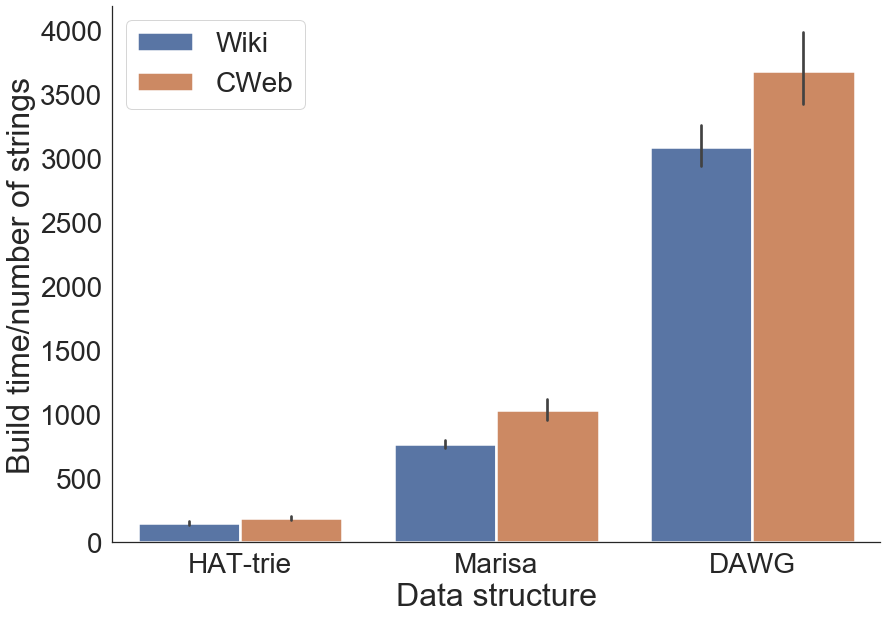

In [22]:
ax = sns.catplot(x="data_structure", y="norm_time", hue="collection",
                 data=build_df, linewidth=2.5, kind="bar", height=8.27, aspect=11.7/8.27, legend=False)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel("Data structure", fontsize=32)
plt.ylabel("Build time/number of strings", fontsize=32)
plt.legend(prop={'size': 28})
plt.show()